In [1]:
import pandas as pd
import re
import json
import html

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

### stack overflow dataset

df_so = pd.read_csv('pt_question_answers_updated.csv')

CLEANR = re.compile('<.*?>')
def cleanhtml(raw_html):
    cleantext = re.sub(CLEANR, '', raw_html)
    cleantext = html.unescape(cleantext)
    return cleantext

df_so["pt_answer"] = df_so["pt_answer"].apply(lambda x: cleanhtml(x))
df_so["pt_title"] = df_so["pt_title"].apply(lambda x: cleanhtml(x))
df_so["pt_body"] = df_so["pt_body"].apply(lambda x: cleanhtml(x))

df_so["question"] = df_so["pt_title"].str.lower() + df_so["pt_body"].str.lower()

df_so["answer"] = df_so["pt_answer"].str.lower()

df_so = df_so[['question', 'answer']]
df_so

,question,answer
0,extracting the top-k value-indices from a 1-d ...,as of pull request #496 torch now includes a b...
1,how to display custom images in tensorboard (e...,it is quite easy to do if you have the image i...
2,python wheels: cp27mu not supportedi'm trying ...,this is exactly that. \nrecompile python under...
3,loading torch7 trained models (.t7) in pytorch...,as of pytorch 1.0 torch.utils.serialization is...
4,pytorch: how to use dataloaders for custom dat...,"yes, that is possible. just create the objects..."
...,...,...
10758,is it possible to perform quantization on dens...,here's how to do this on densenet169 from torc...
10759,"why when the batch size increased, the epoch t...","as you already noticed, there are many factors..."
10760,why does stablediffusionpipeline return black ...,apparently it is indeed an apple silicon (m1/m...
10761,locating tags in a string in php (with respect...,i think i've got something. how about this:\nf...


In [3]:

### discussion forum dataset

df_discuss = pd.read_json('discussion_forum.json')

df_discuss[['question', 'answer']] = df_discuss["text"].apply(lambda x: pd.Series(str(x).split('ANSWER: ', maxsplit=1)))

df_discuss['question'] = df_discuss['question'].str.lstrip('QUESTION:')

df_discuss = df_discuss[['question', 'answer']]

df_discuss["question"] = df_discuss["question"].apply(lambda x: cleanhtml(x))
df_discuss["answer"] = df_discuss["answer"].apply(lambda x: cleanhtml(x))
df_discuss["question"] = df_discuss["question"].str.lower()
df_discuss["answer"] = df_discuss["answer"].str.lower()

df_discuss


,question,answer
0,beginner: should relu/sigmoid be called in th...,"since nn.relu is a class, you have to instanti..."
1,torch.from_numpy not support negative strides...,"how about \n torch.from_numpy(np.flip(x,axis=0..."
2,what is the difference between bcewithlogitsl...,you are right. both loss functions seem to ret...
3,how to train the network with multiple branch...,"opt1 = optim.adam(branch_1.parameters(), ...)\..."
4,how to check for vanishing/exploding gradient...,"in my case, i use this simple code to see valu..."
...,...,...
13229,best way to implement series of weighted rand...,"actually, i figured it out. there was a functi..."
13230,batch_norm causes runtimeerror: expected all ...,\n\n\n dkobayas-cyber:\n\n(when checking argum...
13231,scale gradient without scaling loss values? h...,\n\n\n lisyuan:\n\ni still cannot understand w...
13232,transform normalization? forgive me if i misu...,transforms.normalize subtracts the provided me...


In [4]:
# merge both dataset

df = df_so.append(df_discuss, ignore_index=True)
df

/tmp/ipykernel_1988/2660529762.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_so.append(df_discuss, ignore_index=True)


,question,answer
0,extracting the top-k value-indices from a 1-d ...,as of pull request #496 torch now includes a b...
1,how to display custom images in tensorboard (e...,it is quite easy to do if you have the image i...
2,python wheels: cp27mu not supportedi'm trying ...,this is exactly that. \nrecompile python under...
3,loading torch7 trained models (.t7) in pytorch...,as of pytorch 1.0 torch.utils.serialization is...
4,pytorch: how to use dataloaders for custom dat...,"yes, that is possible. just create the objects..."
...,...,...
23992,best way to implement series of weighted rand...,"actually, i figured it out. there was a functi..."
23993,batch_norm causes runtimeerror: expected all ...,\n\n\n dkobayas-cyber:\n\n(when checking argum...
23994,scale gradient without scaling loss values? h...,\n\n\n lisyuan:\n\ni still cannot understand w...
23995,transform normalization? forgive me if i misu...,transforms.normalize subtracts the provided me...


### checking text length

In [5]:
df['question_len']=df['question'].str.len()
df['answer_len']=df['answer'].str.len()

In [6]:
df

,question,answer,question_len,answer_len
0,extracting the top-k value-indices from a 1-d ...,as of pull request #496 torch now includes a b...,358,767
1,how to display custom images in tensorboard (e...,it is quite easy to do if you have the image i...,598,1020
2,python wheels: cp27mu not supportedi'm trying ...,this is exactly that. \nrecompile python under...,2109,113
3,loading torch7 trained models (.t7) in pytorch...,as of pytorch 1.0 torch.utils.serialization is...,675,516
4,pytorch: how to use dataloaders for custom dat...,"yes, that is possible. just create the objects...",297,1443
...,...,...,...,...
23992,best way to implement series of weighted rand...,"actually, i figured it out. there was a functi...",1498,129
23993,batch_norm causes runtimeerror: expected all ...,\n\n\n dkobayas-cyber:\n\n(when checking argum...,11773,196
23994,scale gradient without scaling loss values? h...,\n\n\n lisyuan:\n\ni still cannot understand w...,2406,606
23995,transform normalization? forgive me if i misu...,transforms.normalize subtracts the provided me...,845,554


### using countplot to see distribution of question length

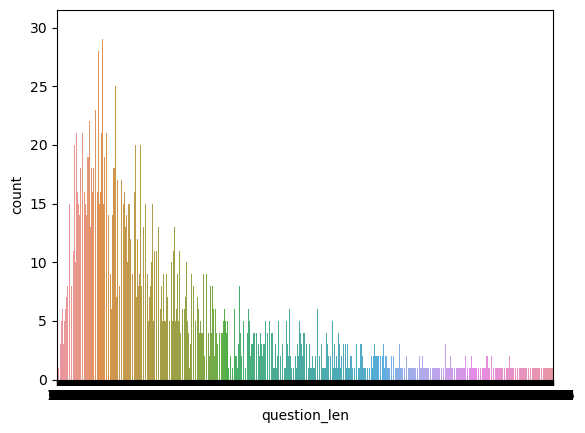

In [7]:

# count plot on single categorical variable
ax = sns.countplot(x ='question_len', data = df)

# Show the plot
plt.show()


### using countplot to see distribution of answer length

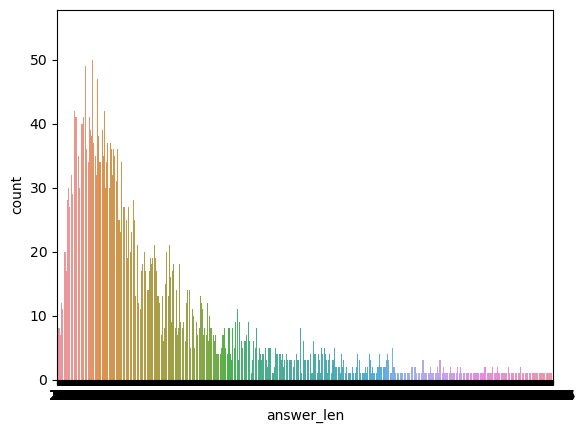

In [8]:

# count plot on single categorical variable
ax = sns.countplot(x ='answer_len', data = df)

# Show the plot
plt.show()


### statistical anaysis

In [7]:
df['answer_len'].describe()

count    23997.000000
mean       658.104680
std        895.513235
min          0.000000
25%        217.000000
50%        402.000000
75%        770.000000
max      29006.000000
Name: answer_len, dtype: float64

In [8]:
df['question_len'].describe()

count    23997.000000
mean      1666.043297
std       2278.978136
min         43.000000
25%        516.000000
50%        945.000000
75%       1890.000000
max      31116.000000
Name: question_len, dtype: float64

### summary:
1. we can see most of question and answer follows log normal distribution, showing some text having very high length
2. there is large difference in mean and median(50th percentile) of both question and answer showing there are extreme datapoints having very high length

### cdf of question length

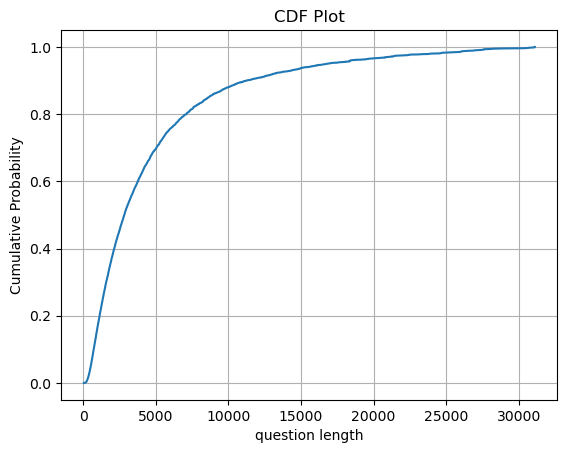

In [9]:

sorted_values = df['question_len'].sort_values()

# Calculate the cumulative distribution
cdf = sorted_values.cumsum() / sorted_values.sum()

# Create the CDF plot
plt.plot(sorted_values, cdf)
plt.xlabel('question length')
plt.ylabel('Cumulative Probability')
plt.title('CDF Plot')
plt.grid(True)
plt.show()


### cdf of answer length

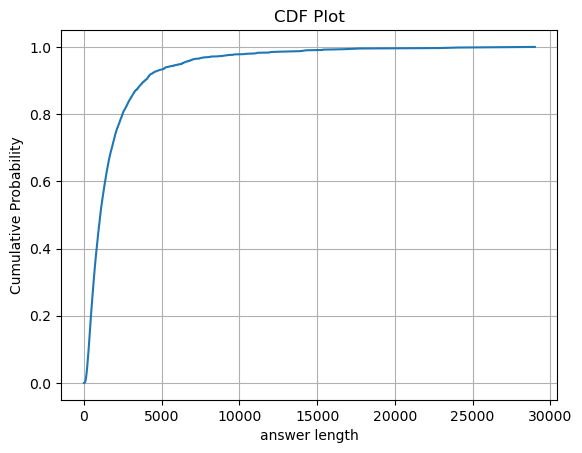

In [10]:

sorted_values = df['answer_len'].sort_values()

# Calculate the cumulative distribution
cdf = sorted_values.cumsum() / sorted_values.sum()

# Create the CDF plot
plt.plot(sorted_values, cdf)
plt.xlabel('answer length')
plt.ylabel('Cumulative Probability')
plt.title('CDF Plot')
plt.grid(True)
plt.show()


### calculating percentile to see length of text varying below specific percentage of data

In [11]:
import numpy as np

r = [10, 20, 30, 40, 50, 60, 70, 80, 90,95,96,97,98,99,100]

# question len

for i in r:
    print(f"{i}th percentile:", np.percentile(df['question_len'], i))


10th percentile: 313.0
20th percentile: 448.0
30th percentile: 587.0
40th percentile: 745.0
50th percentile: 945.0
60th percentile: 1218.0
70th percentile: 1611.0
80th percentile: 2256.7999999999993
90th percentile: 3667.4000000000015
95th percentile: 5402.0
96th percentile: 6008.799999999999
97th percentile: 6949.599999999995
98th percentile: 8338.199999999972
99th percentile: 11143.000000000065
100th percentile: 31116.0


In [12]:
# answer len

for i in r:
    print(f"{i}th percentile:", np.percentile(df['answer_len'], i))


10th percentile: 125.59999999999991
20th percentile: 186.0
30th percentile: 247.0
40th percentile: 321.0
50th percentile: 402.0
60th percentile: 512.0
70th percentile: 663.0
80th percentile: 908.0
90th percentile: 1409.4000000000015
95th percentile: 2015.2000000000007
96th percentile: 2261.16
97th percentile: 2548.0
98th percentile: 3041.639999999985
99th percentile: 4005.320000000007
100th percentile: 29006.0


### assigning categories to question

In [13]:
beginner = [ 'tensor', 'torch' 'matrix', 'operations', 'element-wise', 'broadcasting', 
             'differentiation', 'gradients', 'backpropagation', 'autograd', 'loss', 'function', 
             'neural', 'networks', 'layers', 'activations', 'linear', 'convolutional', 'pooling', 'fully', 'connected', 
             'training', 'forward', 'pass', 'backward', 'optimizer', 'learning', 'rate', 'epoch', 'batch', 'size', 
             'preprocessing', 'dataloader', 'dataset', 'transform', 'normalization', 'augmentation',
             'relu', 'sigmoid', 'tanh', 'cross', 'entropy', 'mse', 'l1', 'regularization', 'l2',
             'dropout', 'sgd', 'adam', 'rmsprop'
           ]

intermediate = [ 'custom', 'dataset', 'dataloader', 'transformation', 'indexing', 
        'transfer', 'learning', 'pre-trained', 'freezing', 'fine-tuning', 'feature','extraction', 
        'evaluation', 'validation', 'accuracy', 'precision', 'recall', 'f1', 'confusion', 'matrix', 'cross-validation', 
        'gpu', 'acceleration', 'cuda', 'memory', 'parallelism',
        'hyperparameter', 'tuning', 'weight', 'decay', 'grid', 'random', 'roc', 'precision-recall', 'auc',
        'saving', 'loading', 'early', 'stopping', 'imbalance'
               ]

advanced = [ 'domain-specific', 'regularization', 'trade-off', 'architectures',
        'rnn', 'lstm', 'gru', 'cnn', 'transformer', 'attention', 'mechanism',
        'interpretability', 'saliency', 'gradient-based',
        'visualization', 'distributed', 'distributeddataparallel', 'dataparallel', 'synchronization',
        'deployment', 'serialization', 'serving'
           ]


In [14]:
from tqdm import tqdm

categories = []

for index, i in tqdm(df.iterrows(), total=len(df)):
    if any(word in i['question'].split() for word in advanced):
        categories.append('advanced')
    elif any(word in i['question'].split() for word in intermediate):
        categories.append('intermediate')
    elif any(word in i['question'].split() for word in beginner):
        categories.append('beginner')
    else:
        categories.append('uncategorized')

100%|███████████████████████████████████| 23997/23997 [00:12<00:00, 1929.84it/s]


In [15]:
len(categories)

23997

In [16]:
from collections import Counter

value_counts = Counter(categories)

for value, count in value_counts.items():
    print(f"{value}: {count} occurrence(s)")


beginner: 7223 occurrence(s)
intermediate: 10633 occurrence(s)
uncategorized: 3457 occurrence(s)
advanced: 2684 occurrence(s)


In [17]:
df['category'] = categories

In [18]:
df

,question,answer,question_len,answer_len,category
0,extracting the top-k value-indices from a 1-d ...,as of pull request #496 torch now includes a b...,358,767,beginner
1,how to display custom images in tensorboard (e...,it is quite easy to do if you have the image i...,598,1020,intermediate
2,python wheels: cp27mu not supportedi'm trying ...,this is exactly that. \nrecompile python under...,2109,113,uncategorized
3,loading torch7 trained models (.t7) in pytorch...,as of pytorch 1.0 torch.utils.serialization is...,675,516,intermediate
4,pytorch: how to use dataloaders for custom dat...,"yes, that is possible. just create the objects...",297,1443,intermediate
...,...,...,...,...,...
23992,best way to implement series of weighted rand...,"actually, i figured it out. there was a functi...",1498,129,intermediate
23993,batch_norm causes runtimeerror: expected all ...,\n\n\n dkobayas-cyber:\n\n(when checking argum...,11773,196,intermediate
23994,scale gradient without scaling loss values? h...,\n\n\n lisyuan:\n\ni still cannot understand w...,2406,606,beginner
23995,transform normalization? forgive me if i misu...,transforms.normalize subtracts the provided me...,845,554,intermediate
